<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Lecture-2---Random-Number-Generator-and-Discrete-Random-Variables" data-toc-modified-id="Lecture-2---Random-Number-Generator-and-Discrete-Random-Variables-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Lecture 2 - Random Number Generator and Discrete Random Variables</a></span><ul class="toc-item"><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#Motivation" data-toc-modified-id="Motivation-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Motivation</a></span></li><li><span><a href="#How?" data-toc-modified-id="How?-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>How?</a></span></li><li><span><a href="#Modular-Arithmetic" data-toc-modified-id="Modular-Arithmetic-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Modular Arithmetic</a></span></li><li><span><a href="#Lineare-Congruential-Generator" data-toc-modified-id="Lineare-Congruential-Generator-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Lineare Congruential Generator</a></span></li><li><span><a href="#LCG-Weakness" data-toc-modified-id="LCG-Weakness-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>LCG Weakness</a></span></li><li><span><a href="#Other-generators" data-toc-modified-id="Other-generators-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Other generators</a></span></li><li><span><a href="#Simulating-other-distributions" data-toc-modified-id="Simulating-other-distributions-1.8"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Simulating other distributions</a></span></li><li><span><a href="#More-efficient-algorithm" data-toc-modified-id="More-efficient-algorithm-1.9"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>More efficient algorithm</a></span></li><li><span><a href="#Discrete-Uniform-Distribution" data-toc-modified-id="Discrete-Uniform-Distribution-1.10"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Discrete Uniform Distribution</a></span></li><li><span><a href="#Generating-a-random-permutation" data-toc-modified-id="Generating-a-random-permutation-1.11"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>Generating a random permutation</a></span></li><li><span><a href="#Random-Permutation-Algorithm" data-toc-modified-id="Random-Permutation-Algorithm-1.12"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Random Permutation Algorithm</a></span></li></ul></li><li><span><a href="#Random-Generator-for-Other-Discrete-Distribution" data-toc-modified-id="Random-Generator-for-Other-Discrete-Distribution-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Random Generator for Other Discrete Distribution</a></span><ul class="toc-item"><li><span><a href="#Inversion-Method-for-Discrete-Random-Variables" data-toc-modified-id="Inversion-Method-for-Discrete-Random-Variables-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Inversion Method for Discrete Random Variables</a></span></li><li><span><a href="#Binomial-Distribution" data-toc-modified-id="Binomial-Distribution-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Binomial Distribution</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In [1]:
import numpy as np
import scipy as sp
import scipy.stats as sps
import scipy.special as spsp
import matplotlib.pyplot as plt
import rpy2 as rpy2
import copy as copy

In [2]:
%matplotlib inline
%load_ext rpy2.ipython
plt.rcParams['figure.figsize'] = [9,6]

# Computer Simulation STAT2005
## Lecture 2 - Random Number Generator and Discrete Random Variables 

**Felix Chan, School of Economics and Finance**

### Motivation 

- We will cover two topics today. Pseudo random generator and simuation of discrete random variables. 
- Most of what we will discuss today have already been implemented in Python and/or R. 
- Use the documentations to find them! 
- Understand how these built-in funtions work allows you to create your own. 
- This is important because built-in functions do not (and cannot) cover all situations.

### Motivation

- Need to be able to simulate randomness.
- Computer algorithms are inherently deterministics. 
- Need to mimick random behaviour that follows a particular probabitlity distribution. 
- How? 


- Create algorithm to generate a sequence of numbers that "looks" random.
- It is possible, recall the logistic map. 
- Pseudo Number Generator.

### How? 

- The most basic and common type (not anymore) of pseudo number generator is the **Linear Congruential Generator** (LCG).
- We need to introduce a basic concept called *modular arithmatic*.
- Put it simply, it is the arithmatic of the remainder. 



### Modular Arithmetic 
<div style="background:rgb(240,212,211)">
Let $a,b \in \mathbb{Z}$ and $n\in \mathbb{Z}^+$ then $a$ and $b$ are congurent modulo $n$ written as 

$$ a \equiv b \quad (\text{mod } n)$$

if 

$$ a=nk + b$$ 


for some $k\in \mathbb{Z}$. </div>

We can look at this definition in a few different ways:

1. The difference between $a$ and $b$ is divisible by $n$. 
2. If $0<b<n$, then $b$ is the remainder of $a$ divided by $n$ (Note that remainder is by definition positive). 
3. $a$ and $b$ has a common remainder after dividing by $n$. 

$$ a = pn + r $$
$$ b = qn + r $$
where $0 \leq r < n$. Note that $a-b = cn$ where $c=p-q$. 

Some Examples:

- $0 \equiv 6$ $(\text{mod } 3)$
- $4 \equiv 24$ $(\text{mod } 5)$
- $-11 \equiv 145$ $(\text{mod } 12)$

In Python '%' represents the modulo operator. $A\%B$ gives the remainder of $A/B$. We can use that to test the examples above. 

In [7]:
0%3 == 6%3, 4%5==24%5, -11%12==145%12

(True, True, True)

In R, the modulo operator is $\%\%$. In other words, $A\%\%B$ gives the remainder of $A/B$. 

In [17]:
%%R
c(0%%3==6%%3, 4%%5==24%%5, -11%%12==145%%12)

[1] TRUE TRUE TRUE


### Lineare Congruential Generator

A Linear Congruential Generator (LCG) is a sequence of numbers generated by the following difference equation: 
    
$$ y_{t+1} = (Ay_t + B) \quad (\text{mod } m)$$

where $ 0<A<m $, $ 0\leq B<m $ and $m$ are fixed integers.

$A$, $B$ and $m$ are often called the multiplier, increment and modulus, respectively. When $B=0$, this is called the **multiplicative congruential generator**. 

To start the process, we need an initial value, $y_0 \in [0,m-1]$. Consider the case where $A=127$, $B=7$, $m=511$ and $y_0=1$.

In [3]:
def LCG(N, A, B, m, y0):
    """
    An implementation of the linear congruential generator. 
    Inputs:
        N: int. The number of pseudo number generator. 
        A: int. The multipler.
        B: int. The increment.
        m: int. Modulus. 
        y0: int in [0, m-1]. The initial value. 
    Output:
        y: (N,) numpy array. 
    """
    
    if (y0 <0)|(y0>=m):
        print("The initial value cannot be negative or greater than the modulus.") 
    elif (A>=m)|(A<0):
        print("The multiplier cannot be negative or greater than the modulus.")
    elif (B>=m)|(B<0):
        print("The increment cannot be negative or greater than the modulus.")
    else:
        y = np.zeros(N+1)
        y[0] = y0
        for t in np.arange(N):
            y[t+1] = (A*y[t]+B)%m
    return y[1:N+1]/m

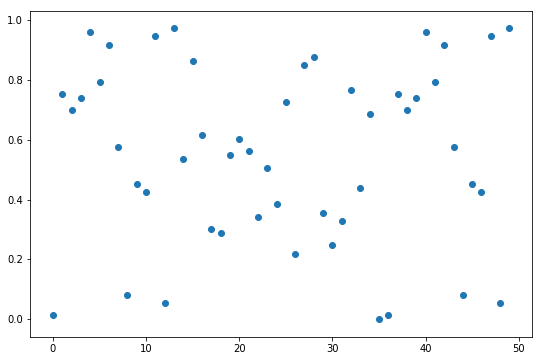

In [50]:
N,A,B,m,y0 = 50,127,7,511,0
y = LCG(N, A, B, m, y0)
xrange = np.arange(N)
plt.scatter(xrange,y)

So that looks promising. What if we generate 500 rather 50 numbers? 

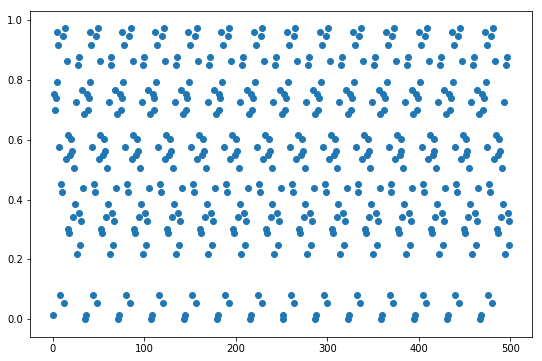

In [51]:
N = 500
y1 = LCG(N, A, B, m, y0)
xrange = np.arange(N)
plt.scatter(xrange, y1)

Oops.... pattern repeated. What is happening? 
Let's try a differnt modulus. $m=2^{16}$

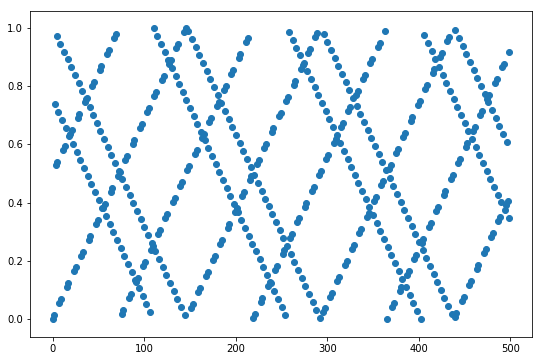

In [52]:
N=500
m,xrange = int(2**16), np.arange(N)
y2 = LCG(N,A,B,m,y0)
plt.scatter(xrange, y2)

This is worse?! How about $m=2^{24}$?

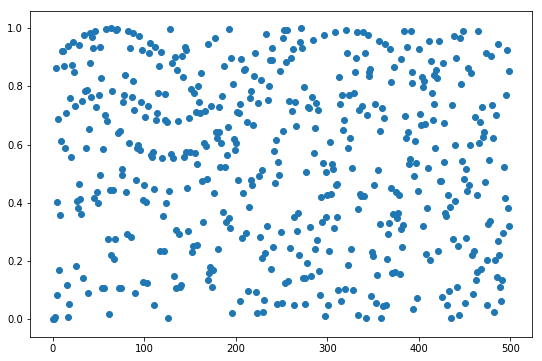

In [53]:
m = int(2**24)
y2 = LCG(N,A,B,m,y0)
plt.scatter(xrange, y2)

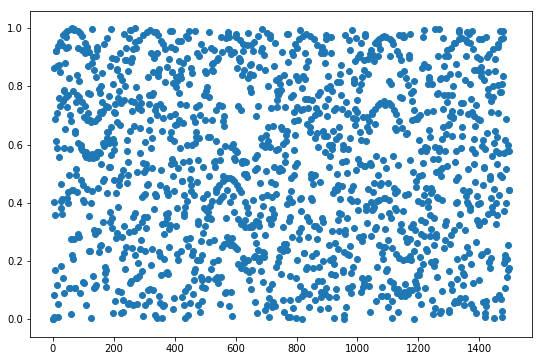

In [54]:
N =1500
xrange = np.arange(N)
y3 = LCG(N,A,B,m,y0)
plt.scatter(xrange, y3)

### LCG Weakness

- So what is happening? 

- The nature of modulo arithmetic means the sequence will eventually repeat itself. 
- The maximum period is clearly $m$ but may be less. 
- It also means that for small $m$ only very few numbers in $[0,1]$ can be generated. In other words, not all numbers in the interval can occur with equal probability. 
- This creates a lot of problem in the 50's as it was the most popular algoirthm to generate pseudo random number, especially with $B=0$ (MCG). 
- People starting to notice problems in the mid 60 which led to a new literature on this. 
- This remains to be an active area of research. 
- A classic example of connection between statistics, probability, abstract algebra and number theory. 

### Other generators

- 64-bit Xorshift. 
    - Marsaglia (2003) ([See Paper here](http://www.jstatsoft.org/v08/i14/paper)). 

- Mersenne Twister (MT). 
    - Matsumoto and Nishimura (1998) (See Reading list for the original paper). 
    - Used by both Python/Numpy/Scipy and R.

- Useful review. *Numerical Recipes: The art of scientific computing* Third Edition, chapter 7 section 7.1.



### Simulating other distributions

- You may wonder why the literature spent so much efforts in simulating the uniform distribution. 
- It turns out once we got that correct, we can simulate almost any other distributions. 
- Consider a random variables $X$ which takes on vlaues $\{0,1,2,3\}$ with probability $(0.2,0.15,0.25,0.4)$. 
- How do we simulate $X$? 


- We can simulate a random variable, $U\in [0,1]$, that follows an uniform distribution using methods above. 
    1. If $U<0.2$ then set $X=0$, else if 
    2. $U<0.35$ then set $X=1$, else if
    3. $U<0.6$ then set $X=2$, else $X=3$. 

In [50]:
def discrete_example(N,pvector):
    """
    Simulate a N vector of random draws given the probability vector p. 
    Inputs:
        N: positive int. The number of random draws. 
        pvector: k-list, containing the probabilities of all k outcomes. 
    Output:
        y: (N,) numpy array. N random draw of X following the probability vector p. 
    
    """

    U = sps.uniform.rvs(size=N)
    y = np.zeros(N)
    cp = np.cumsum(pvector)
    for i,p in enumerate(cp):
        if i > 0:
            y[(U<p)&(U>cp[i-1])] = i
    return y
    

In [75]:
N,p = 5000, [0.2,0.15,0.25,0.4] 
y = discrete_example(N,p)

(array([0.1936, 0.1486, 0.2552, 0.4026]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

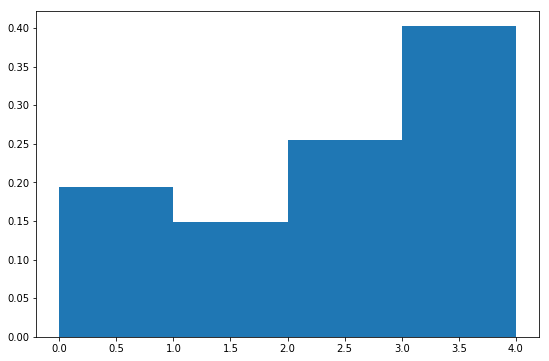

In [76]:
plt.hist(y, bins=np.arange(5), normed=1)

### More efficient algorithm 

- Note that the code above is not restricted to just four outcomes. 
- The algorithm works in principle for any number of outcomes. 
- As the number of outcomes increases, this may not be the most efficient. Why?  

- becuse as the number of conditional statement increases. So the number of evaluation increases on average. 
- We can improve this by simply re-ordering the conditional statement in decending order of probabilties. 
- Since the outcome with the highest probability comes first, on average, any $U$ that satisfies the first condition will not need to go to the second. Similar, any $U$ that fails the first condition but satisfies the second will not need to go to the third condition. 
- So this minimises the number of evaluation. 

- However this may not be relevant to the code above (why?)  

### Discrete Uniform Distribution

- This is a special case of the above where the probability vector is the $\displaystyle \frac{\mathit{i}_n}{n}$ where $\mathit{i}_n$ is a $n\times 1$ vector of ones and $n$ is the number of possible outcomes. 
- In this case 
    $$X=j-1 \quad\text{ if }\quad \frac{j-1}{n} \leq U \leq \frac{j}{n}$$
where $U$ is a random draw from $U[0,1]$. 

- This works becasue all outcomes share the same probability, so all we need to do is to divide the $[0,1]$ interval equally. 

- Note that the value of the RV allows us to write $X=int(nU)$ where $int(x)$ is the integer part of the numer $x$. 

In [69]:
def rv_discrete_uniform(N,n):
    """
    Simulate discrete uniform distribution with n outcomes. 
    Inputs:
        N: positive int. The number of observations to simulate. 
        n: positive int. The number of possible outcomes. 
    Output:
        y: (N,) numpy array. 
    """
    
    U = sps.uniform.rvs(0,1,size=N)
    X = [int(n*i) for i in U]
    return np.array(X)

(array([0.2526, 0.2518, 0.2564, 0.2392]),
 array([0, 1, 2, 3, 4]),
 <a list of 4 Patch objects>)

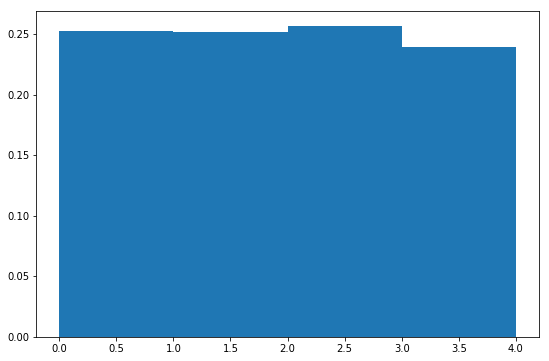

In [73]:
N = 5000
n = 4
y_discrete = rv_discrete_uniform(N,n)
plt.hist(y_discrete, bins=np.arange(n+1), normed=1)

### Generating a random permutation 

- Let consider a set with $N$ elements $\{x_1, \ldots, x_n \}$. How do we generate a random permuation of the set, assuming all $n!$ permutation are equally likely? 

- A key to this question is the fact that we are essentially looking for a different permutation of the index. 
- In other words, we are looking to generate a different permutation of $\{0,\ldots,n-1\}$ and create the map $\{0,\ldots, n-1\} \rightarrow \{z_0,\ldots,z_{n-1}\}$ where $z_i$ is an element of $\{0,\ldots, n-1\}$ and $z_i \neq z_j$. 
- Since all permutations are equally likely, this is essentially a discrete random variable with $n!$ outcomes. 
- So we can utilise the algorithm above. 

### Random Permutation Algorithm 

<div style="background:rgb(200,200,255)">
    <ol>
        <li> Let $\{p_1,\ldots, p_n\}$ be any permutation of $\{1, \ldots, n\}$. E.g. $p_i = i$ for $i=1,\ldots,n$. </li>
        <li> Set $k=n$ </li>
        <li> Draw from $U(0,1)$ and let $m=int(kU)+1$. </li>
        <li> Interchange the values of $p_k$ and $p_m$. </li>
        <li> Set $k=k-1$ and if $k>0$ go to Step 3 else stop. </li>
    </ol>
</div>        

In [75]:
def random_permutation(x):
    """
    Generate random permutation of the list x. 
    Input:
        x: list. 
    Output:
        y: list. Contains the same elements as x but in different order. 
    """
    
    n = len(x)   
    y = copy.copy(x)
    for i in np.arange(n-1,-1,-1):
        u = sps.uniform.rvs(size=1)
        p = int(i*u)
        temp = y[p]
        y[p] = y[i]
        y[i] = temp
    return y

In [78]:
f = ["kirk", "picard", "janeway", "sisko"]
fswap = random_permutation(f)
f, fswap

(['kirk', 'picard', 'janeway', 'sisko'],
 ['picard', 'janeway', 'sisko', 'kirk'])

- note that the algorithm above can be used to generate random subset. 
- All that is required is to specify how many elements are there in the subset. 

In [94]:
def random_permutation_subset(x, subset="All"):
    """
    Generate random permutation of the list x. 
    Input:
        x: list. 
    Output:
        y: list. Contains the same elements as x but in different order. 
    """
    
    n = len(x)
    if subset == "All":
        sn = n 
    else:
        sn = subset
    if sn>n:
        print("The size of the subset cannot exceed the size of the list.")
    else:
        y = copy.copy(x)
        for i in np.arange(n-1,n-sn-1,-1):
            u = sps.uniform.rvs(size=1)
            p = int(i*u)
            temp = y[p]
            y[p] = y[i]
            y[i] = temp
        return y[n-sn:n]

In [98]:
fswap_sub = random_permutation_subset(f,3)
f,fswap_sub

(['kirk', 'picard', 'janeway', 'sisko'], ['kirk', 'sisko', 'picard'])

## Random Generator for Other Discrete Distribution

- So we now know how to generate (pseudo) random draws from a uniform distribution as well as generating random permutations. 
- What about other distributions? 


- In most cases, it turns out that once we can generate random draws from a $U(0,1)$, we can generate random draws from other distributions. 
- One of the methods is called the **inversion method**. 
- In fact, all the algorithms we have discussed so far are special cases of this method. 

### Inversion Method for Discrete Random Variables

The method works like this, let $F(x)$ denotes the cumulative distribution of a discrete random variable $X$ which takes on values from $\{0,1,2,3,\ldots\}$ then 

1. Generate a random number, $u$, from $U(0,1)$.
2. Set $x=0$.
3. If $u\leq F(x)$ then return $x$. 
4. If $u>F(x)$ then set $x=x+1$ and return to Step 3. 

To see why this algorithm works, consider 

$$\begin{align} 
    \text{Pr} (X=x) =& \text{Pr} \left [ u \in \left ( F(x-1), F(x) \right ) \right ] \\
                    =& F(x)-F(x-1) \\
                    =& p(x)
   \end{align} $$

![inverse](./pics/inverse.png)

### Binomial Distribution 
Recall the PMF of a binomial distribution is 

$$ b(x;n,p) = \begin{pmatrix} n \\ x \end{pmatrix} p^x(1-p)^{n-x} $$

We can construct a function that returns a set of $N$ random draws following the binomial distribution using the algorithm above. 

In [77]:
def PMF_binomial(x, n, p):
    """
    PMF of a Binomial distribution given n and p. 
    Inputs:
        n: positive int. The upper bound of the RV. 
        p: probability of success. 
        x: [0,n]. 
    Output:
        b: the probability of x. 
    """
    if (x>n)|(x<0):
        print("x cannot be negative or larger than n")
    elif (p<0)|(p>1):
        print('Probability cannot be negative or greater than 1')
    else:
        return spsp.comb(n,x)*np.power(p,x)*np.power(1-p,n-x)



In [78]:
def CDF_binomial(x, n, p):
    """
    CDF of the Binomial distribution. 
     Inputs:
        n: positive int. The upper bound of the RV. 
        p: probability of success. 
        x: [0,n]. 
    Output:
        b: the cumulative probability up to x. 
    """
    
    sumset = [PMF_binomial(i,n,p) for i in np.arange(0,x+1,1)]
    return sum(sumset)

In [79]:
def __choose_x__(u,n,p):
    """
    Decide the value of x to be returned given the uniform draw u and the Poisson parameter l. To be used with RV_poisson()
    Inputs:
        u: Random draw from a U(0,1) distribution.
        n: positive int. The upper bound of the RV. 
        p: probability of success.  
    Output:
        x: int. Random draw from a poisson distribution. 
    """
    to_return = False
    x = 0
    while to_return is False:
        cdf = CDF_binomial(x,n,p)
        if u > cdf:
            x = x+1
        else:
            to_return = True
    return x



In [80]:
def RV_binomial(N,n,p):
    """
    Simulate a set of N random draws based on the Poisson distribution with parameter l using the Inversion method. 
    Inputs:
        N: Positive int. The numebr of draws. 
        n: positive int. The upper bound of the RV. 
        p: probability of success.  
    Output:
        y: (N,) numpy array containing N random draws. 
    
    """
    U = sps.uniform.rvs(0,1,size=N)
    y = np.zeros(N)
    for i,u in enumerate(U):
        y[i] = __choose_x__(u,n,p)
    return y

(array([0.    , 0.0028, 0.0084, 0.0284, 0.0698, 0.1022, 0.1516, 0.1672,
        0.159 , 0.1218, 0.0876, 0.05  , 0.0278, 0.013 , 0.0084, 0.0014,
        0.0006, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    ]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 <a list of 30 Patch objects>)

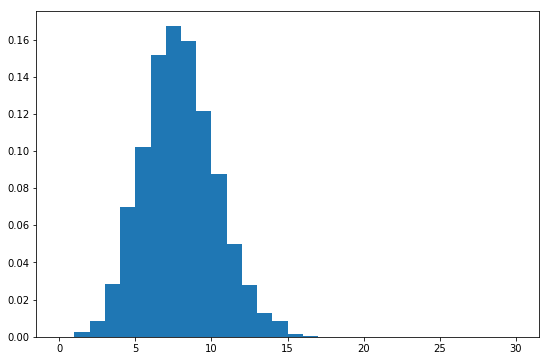

In [82]:
N,n,p = 5000,30,0.25
B = RV_binomial(N,n,p)
plt.hist(B, bins=np.arange(n+1), normed=1)

**But we can do better **
- While this is a straight implementation of the algorithm, it is not the most efficent. 
- Efficiency can be easily improved. 
- How? Have a think before the workshop... 

## Conclusion

- Pseudo random generator via LCG and MCG.
- Importance on the quality of Pseudo Random Generator. 
- Simulating Discrete Random Variables via the Inversion Method. 